In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_wine_quality_dataset_path = kagglehub.dataset_download('yasserh/wine-quality-dataset')

print('Data source import complete.')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 21.5k/21.5k [00:00<00:00, 15.3MB/s]

Extracting files...
Data source import complete.


In [4]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from scipy.stats import chi2
import statsmodels.api as sm

# import sklearn modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier, 
    ExtraTreesClassifier, 
    BaggingClassifier, 
    VotingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

# import warnings
import warnings
warnings.filterwarnings('ignore')

# display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for saving models
import joblib
import pickle

In [19]:
# load the dataset
df= pd.read_csv('/Users/micah/Desktop/winequality-white.csv', sep = ';')


In [7]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [8]:
df.tail()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...
4897,6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;1...


In [9]:
df.shape

(4898, 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [11]:
df.describe().T

,count,unique,top,freq
"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",4898,3961,7;0.15;0.28;14.7;0.051;29;149;0.99792;2.96;0.3...,8


In [20]:
df.corr().T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [13]:
df.dtypes

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    object
dtype: object

In [14]:
df.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

In [21]:
df.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.99, 1])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.00,3.8,0.08,0.00,0.6,0.009,2.0,9.00,0.987110,2.72,0.22,8.0,3.0
0.05,5.6,0.15,0.17,1.1,0.027,11.0,75.00,0.989638,2.96,0.34,8.9,5.0
0.25,6.3,0.21,0.27,1.7,0.036,23.0,108.00,0.991723,3.09,0.41,9.5,5.0
0.50,6.8,0.26,0.32,5.2,0.043,34.0,134.00,0.993740,3.18,0.47,10.4,6.0
0.75,7.3,0.32,0.39,9.9,0.050,46.0,167.00,0.996100,3.28,0.55,11.4,6.0
0.99,9.2,0.63,0.74,18.8,0.160,81.0,241.03,1.000302,3.60,0.83,13.4,8.0
1.00,14.2,1.10,1.66,65.8,0.346,289.0,440.00,1.038980,3.82,1.08,14.2,9.0


In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

NameError: name 'white_wine' is not defined

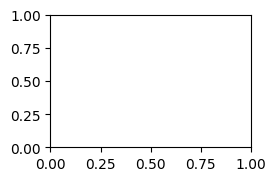

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric features with correct column names
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(15,10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=white_wine[feature])  # or red_wine[feature] depending on which dataset you want to plot
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [16]:
# This is a function to detect outliers based on IQR
def detect_outliers(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    higher_bound = Q3 - 1.5 * IQR
    outliers = detect_outliers(df, feature)
    print(f"Outliers detected in {feature} using IQR: {len(outliers)}")
    print(outliers)
    print()


In [17]:
# fucntion to detect outliers based on z-score
def detect_outliers_zscore(df, features):
    outliers = []
    threshold = 3
    mean = np.mean(df[features])
    std = np.std(df[features])
    for i in df.index:
        z_score = (df.loc[i, features] - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


# applying the z-score method to all numeric features
for feature in numeric_features:
    outliers = detect_outliers_zscore(df, feature)
    print(f"Outliers detected in {feature} using z-score: {len(outliers)}")
    print(outliers)
    print()


NameError: name 'numeric_features' is not defined

In [ ]:
df.columns


In [ ]:
# creating new terms by multiplying existing features
df['pH_alcohol'] = df['pH'] * df['alcohol']
df['acidity_sulphates'] = df['fixed acidity'] * df['sulphates']

# checkinh correlation after creating new features
interaction_features = ['pH_alcohol', 'acidity_sulphates']

plt.figure(figsize=(8, 6))
sns.heatmap(df[interaction_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
